In [1]:
origin=loans[(loans['fromCountry']!=loans['toCountry'])&(loans['fromCountry'].isin(['England','Spain','Germany','Italy','France','Netherlands','Portugal','Russia','Turkey']))] \
    .rename(columns={'fromCountry':'Country'}).groupby(['season','Country'])['id'].count().unstack() \
    .cumsum()
destination=loans[(loans['fromCountry']!=loans['toCountry'])&(loans['toCountry'].isin(['England','Spain','Germany','Italy','France','Netherlands','Portugal','Russia','Turkey']))] \
    .rename(columns={'toCountry':'Country'}).groupby(['season','Country'])['id'].count().unstack() \
    .cumsum()


fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10,10),sharex=True,sharey=False)


origin.plot(ax=axes[0],colormap='Set1',title="cumulative # of international loans by origin country",xticks=[1995,2000,2005,2010,2015])
destination.plot(ax=axes[1],colormap='Set1',title="cumulative # of international loans by destination country",xlim=(1995,2015))

plt.subplots_adjust(wspace=0,hspace=0.1)

fig.savefig('intl_loans_by_country.png')

#ax1.set(sub1)

NameError: name 'loans' is not defined

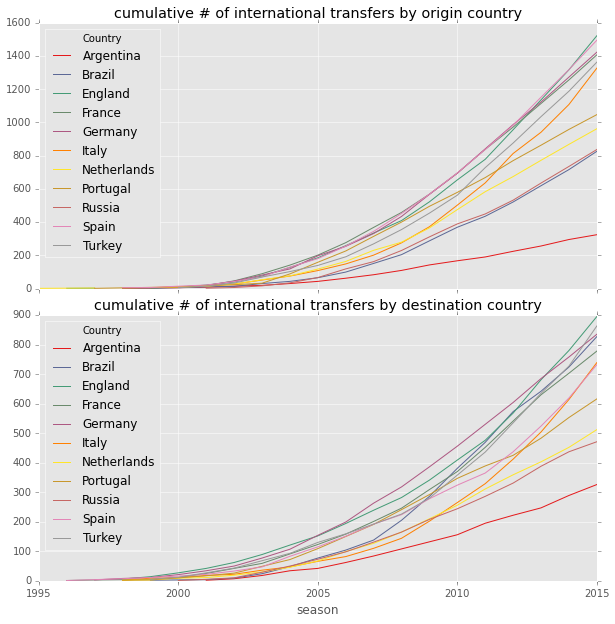

In [31]:
origin=nonloans[(nonloans['fromCountry']!=nonloans['toCountry'])&(nonloans['season']>0)&(nonloans['Age'].between(27,50))&(nonloans['fromCountry'].isin(['England','Brazil','Argentina','Spain','Germany','Italy','France','Netherlands','Portugal','Russia','Turkey']))] \
    .rename(columns={'fromCountry':'Country'}).groupby(['season','Country'])['id'].count().unstack() \
    .cumsum()
destination=nonloans[(nonloans['fromCountry']!=nonloans['toCountry'])&(nonloans['season']>0)&(nonloans['Age'].between(27,50))&(nonloans['toCountry'].isin(['England','Brazil','Argentina','Spain','Germany','Italy','France','Netherlands','Portugal','Russia','Turkey']))] \
    .rename(columns={'toCountry':'Country'}).groupby(['season','Country'])['id'].count().unstack() \
    .cumsum()


fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10,10),sharex=True,sharey=False)


origin.plot(ax=axes[0],colormap='Set1',title="cumulative # of international transfers by origin country",xticks=[1995,2000,2005,2010,2015])
destination.plot(ax=axes[1],colormap='Set1',title="cumulative # of international transfers by destination country",xlim=(1995,2015))

plt.subplots_adjust(wspace=0,hspace=0.1)

fig.savefig('intl_transfers_by_country.png')


#ax1.set(sub1)

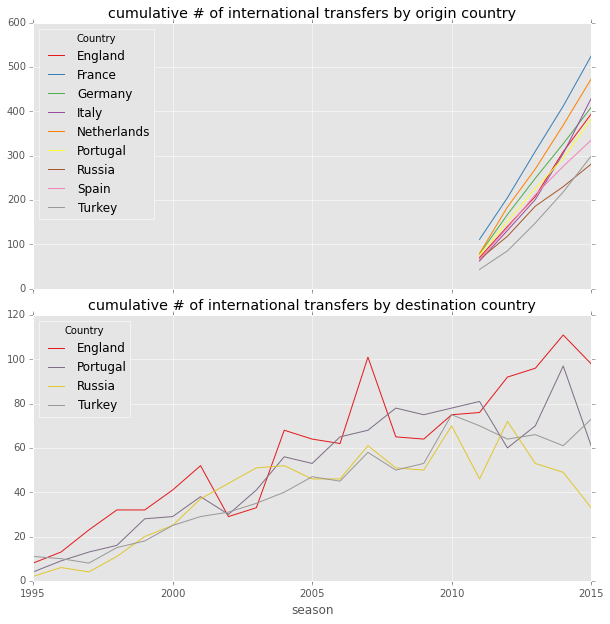

In [332]:
origin=nonloans[(nonloans['fromCountry']!=nonloans['toCountry'])&(nonloans['season']>2010)&(nonloans['Age'].between(20,25))&(nonloans['fromCountry'].isin(['England','Spain','Germany','Italy','France','Netherlands','Portugal','Russia','Turkey']))] \
    .rename(columns={'fromCountry':'Country'}).groupby(['season','Country'])['id'].count().unstack() \
    .cumsum()
destination=nonloans[(nonloans['fromCountry']!=nonloans['toCountry'])&(nonloans['season']>0)&(nonloans['Age'].between(20,25))&(nonloans['toCountry'].isin(['England','Portugal','Russia','Turkey']))] \
    .rename(columns={'toCountry':'Country'}).groupby(['season','Country'])['id'].count().unstack() \
    #.cumsum()


fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10,10),sharex=True,sharey=False)


origin.plot(ax=axes[0],colormap='Set1',title="cumulative # of international transfers by origin country",xticks=[1995,2000,2005,2010,2015])
destination.plot(ax=axes[1],colormap='Set1',title="cumulative # of international transfers by destination country",xlim=(1995,2015))

plt.subplots_adjust(wspace=0,hspace=0.1)

fig.savefig('intl_transfers_by_country.png')


#ax1.set(sub1)

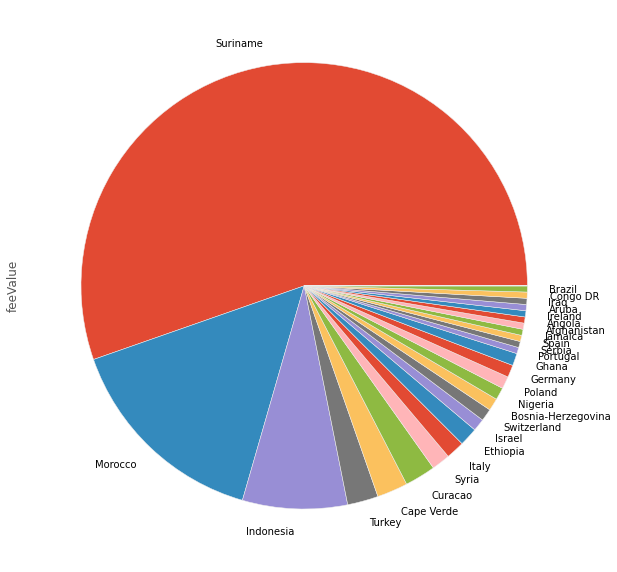

In [308]:
t=nonloans[(nonloans['toLeague']=='NL1')&(nonloans['Nationality']=='Netherlands')]
teamIdMap=t.drop_duplicates('fromTeamId')[['fromTeamId','fromTeamName']].set_index('fromTeamId').to_dict()['fromTeamName']

t.groupby('Nationality 2')[['feeValue']].count().sort_values('feeValue',ascending=False).rename(index=teamIdMap)['feeValue'].plot.pie(figsize=(10,10))

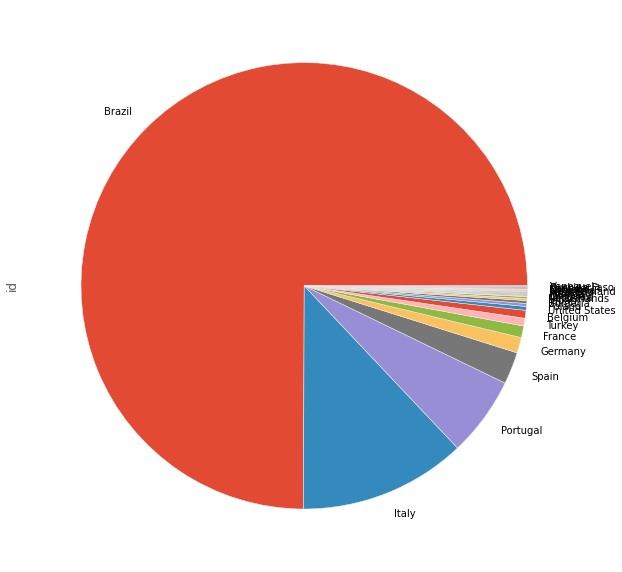

In [323]:
t=players[players['Nationality']=='Brazil'].copy()
t['Nationality 2']=np.where(t['Nationality 2'].isnull(),t['Nationality'],t['Nationality 2'])

t.groupby('Nationality 2')[['id']].count().sort_values('id',ascending=False).rename(index=teamIdMap)['id'].plot.pie(figsize=(10,10))

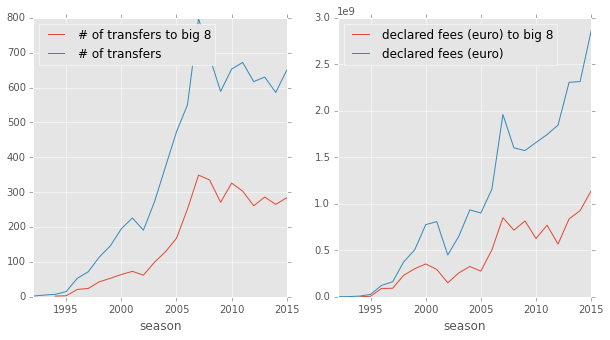

In [334]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5),sharex=True)

#()
t1=nonloans[(nonloans['fromCountry']!=nonloans['toCountry'])&(nonloans['feeValue']>0)&~(nonloans['toCountry'].isin(['England','Germany','France','Sapin','Netherlands','Portugal','Belgium','Turkey','Russia']))].groupby('season')[['id','feeValue']].agg({'id':'count','feeValue':'sum'}).rename(columns={'id': '# of transfers to big 8','feeValue':"declared fees (euro) to big 8"})
#t2=nonloans[nonloans['fromCountry']!=nonloans['toCountry']].groupby('season')[['id','feeValue']].agg({'id':'count','feeValue':'sum'}).rename(columns={'id': '# of transfers','feeValue':"declared fees (euro)"})
t2=nonloans[(nonloans['fromCountry']!=nonloans['toCountry'])&(nonloans['feeValue']>0)].groupby('season')[['id','feeValue']].agg({'id':'count','feeValue':'sum'}).rename(columns={'id': '# of transfers','feeValue':"declared fees (euro)"})

t1[['# of transfers to big 8']].plot(ax=axes[0],xlim=(1995,2015))
t1[['declared fees (euro) to big 8']].plot(ax=axes[1])
t2[['# of transfers']].plot(ax=axes[0],xlim=(1995,2015))
t2[['declared fees (euro)']].plot(ax=axes[1])

In [223]:
t=nonloans[(nonloans['fromCountry']!=nonloans['toCountry'])&~(nonloans['toCountry'].isnull())&(nonloans['season'].between(2010,2015))].groupby(['toTeamId','toTeamName'])[['id','feeValue']].agg({'id':'count','feeValue':'sum'}).rename(columns={'id': '# of transfers','feeValue':"declared fees (euro)"})

t.sort_values("# of transfers",ascending=False)[:10]

,,declared fees (euro),# of transfers
toTeamId,toTeamName,,
162.0,Monaco,272910000.0,68
683.0,Olympiacos,72295000.0,57
3057.0,Standard Liège,34780000.0,55
410.0,Udinese Calcio,87380000.0,54
294.0,Benfica,188860000.0,52
6321.0,Vancouver,4064000.0,52
12.0,AS Roma,193799000.0,49
336.0,Sporting CP,72226000.0,47
3205.0,Kayserispor,12220000.0,45


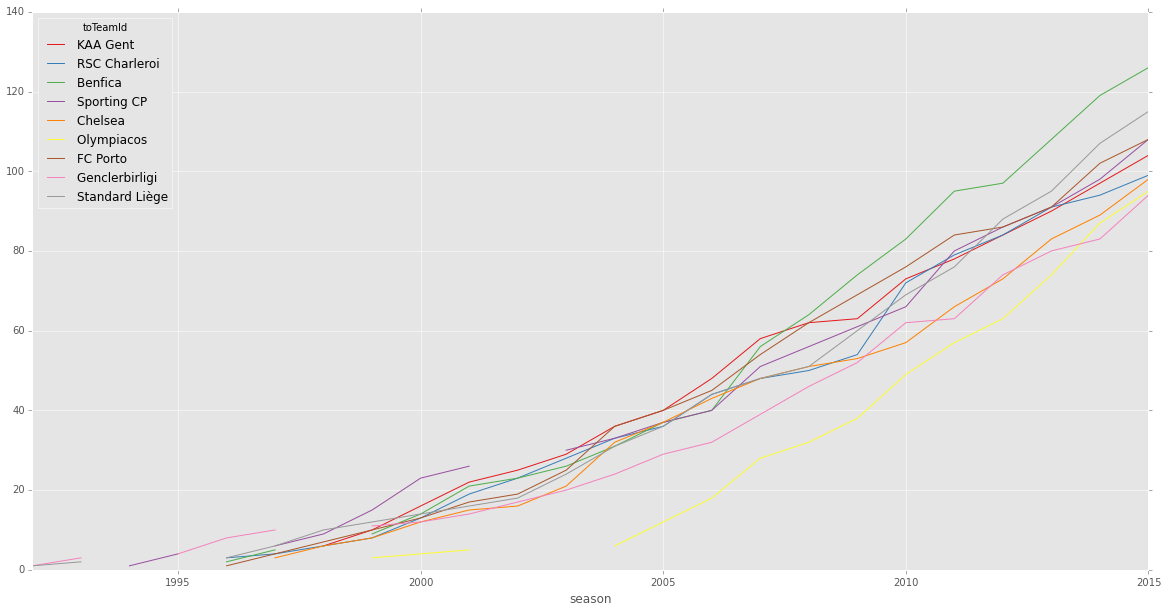

In [222]:
t=nonloans[(nonloans['toTeamId'].isin([294,3057,336,720,157,172,631,683,820]))&(nonloans['toCountry']!=nonloans['fromCountry'])] 

teamIdMap=t.drop_duplicates('toTeamId')[['toTeamId','toTeamName']].set_index('toTeamId').to_dict()['toTeamName']

#t.groupby(['season','fromTeamId'])['id'].count().rolling(window=1,center=False).mean().unstack().rename(columns=teamIdMap).plot(figsize=(20,10),colormap='Set1')
t.groupby(['season','toTeamId'])['id'].count().rolling(window=1,center=False).mean().unstack().cumsum().rename(columns=teamIdMap).plot(figsize=(20,10),colormap='Set1')

In [221]:
teamIdMap

{157.0: 'KAA Gent ',
 162.0: 'Monaco ',
 172.0: 'RSC Charleroi ',
 294.0: 'Benfica ',
 336.0: 'Sporting CP ',
 631.0: 'Chelsea ',
 683.0: 'Olympiacos ',
 720.0: 'FC Porto ',
 820.0: 'Genclerbirligi ',
 3057.0: 'Standard Li\xc3\xa8ge '}

In [27]:
nonloans[(nonloans['fromCountry']!='Romania')&(nonloans['toCountry']=='Cyprus')].groupby(('toTeamName','toLeague'))[['id']].count().sort_values('id',ascending=False)

,,id
toTeamName,toLeague,
Omonia Nikosia,ZYP1,66
Anor. Famagusta,ZYP1,64
AEK Larnaca,ZYP1,61
Apol. Limassol,ZYP1,60
AEL Limassol,ZYP1,59
APOEL Nicosia,ZYP1,52
Nea Salamis,ZYP1,48
En. Paralimni,ZYP1,47
Ermis Aradippou,ZYP1,45


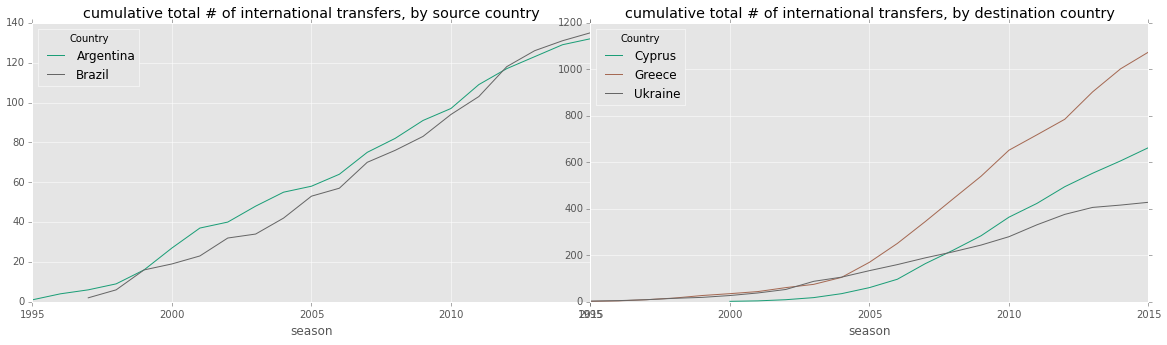

In [75]:
countrylist=['Romania','Cyprus','Greece']

origin=nonloans[('Italy'==nonloans['toCountry'])&(nonloans['fromCountry'].isin(['Argentina','Brazil']))] \
    .rename(columns={'fromCountry':'Country'}).groupby(['season','Country'])['id'].count().unstack() \
    .cumsum()
destination=nonloans[(nonloans['toCountry']!=nonloans['fromCountry'])&(nonloans['toCountry'].isin(['Greece','Cyprus','Ukraine']))] \
    .rename(columns={'toCountry':'Country'}).groupby(['season','Country'])['id'].count().unstack() \
    .cumsum()
    # .rolling(window=3,center=False).mean() \

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,5),sharex=True,sharey=False)


origin.plot(ax=axes[0],colormap='Dark2',title="cumulative total # of international transfers, by source country",xticks=[1995,2000,2005,2010,2015])
destination.plot(ax=axes[1],colormap='Dark2',title="cumulative total # of international transfers, by destination country",xlim=(1995,2015))

plt.subplots_adjust(wspace=0,hspace=0.1)

#fig.savefig('intl_transfers_by_country_cyprus_etc.png')


#ax1.set(sub1)

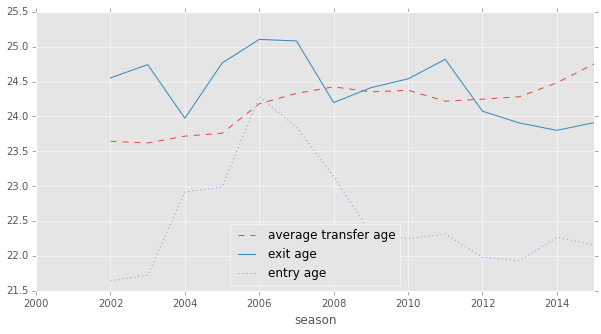

In [332]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,5),sharex=True,sharey=False)

w=nonloans[(nonloans['toCountry']!=nonloans['fromCountry'])&(nonloans['feeValue']>0)&(nonloans['season']>=2000)]
t=nonloans[(nonloans['toCountry']!=nonloans['fromCountry'])&(nonloans['feeValue']>0)&(nonloans['fromCountry']=='Netherlands')&(nonloans['season']>=2000)]
s=nonloans[(nonloans['toCountry']!=nonloans['fromCountry'])&(nonloans['feeValue']>0)&(nonloans['toCountry']=='Netherlands')&(nonloans['season']>=2000)]

w.groupby('season')['Age'].median().rolling(window=3,center=False).mean().rename('average transfer age').plot.line(ax=axes, ls='--', legend=True)
t.groupby('season')['Age'].median().rolling(window=3,center=False).mean().rename('exit age').plot.line(ax=axes,legend=True)
s.groupby('season')['Age'].median().rolling(window=3,center=False).mean().rename('entry age').plot.line(ax=axes, ls=':', legend=True)
#t[['season','Age']].groupby('season').describe()['Age'].unstack(level=0).ix['min':'max'].plot.box(ax=axes)

#(t.groupby('season')['Age'].count()).rolling(window=2,center=False).mean().plot.line(ax=axes)

In [199]:
#139150 
len(nonloans[nonloans['feeValue']!=0])

87541

In [93]:
nonloans[nonloans['toCountry']=='Romania'].groupby('Nationality')['id'].count().sort_values(ascending=False)[:10]

Nationality
Romania     452
Portugal     96
Brazil       61
France       29
Spain        23
Serbia       19
Senegal      19
Italy        17
Cameroon     15
Nigeria      14
Name: id, dtype: int64

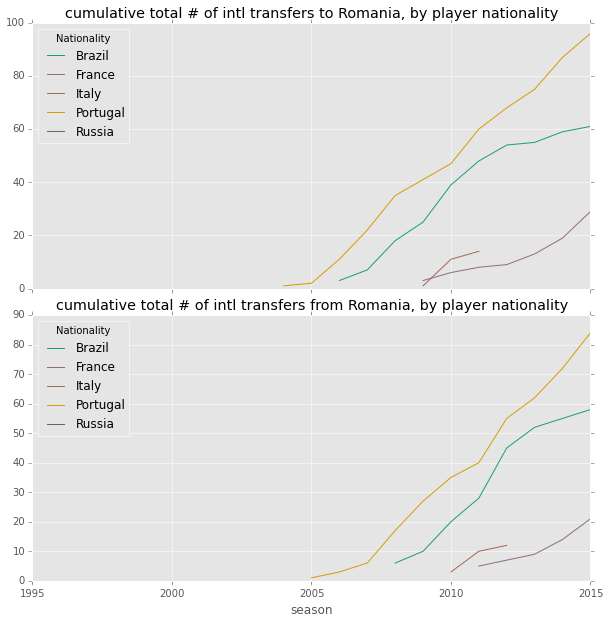

In [97]:



origin=nonloans[('Romania'==nonloans['toCountry'])&(nonloans['Nationality'].isin(['Portugal','Italy','France','Russia','Brazil']))] \
    .rename(columns={'fromCountry':'Country'}).groupby(['season','Nationality'])['id'].count().unstack() \
    .cumsum()

destination=nonloans[('Romania'==nonloans['fromCountry'])&(nonloans['Nationality'].isin(['Portugal','Italy','France','Russia','Brazil']))] \
    .rename(columns={'toCountry':'Country'}).groupby(['season','Nationality'])['id'].count().unstack() \
    .cumsum()
    
    
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10,10),sharex=True,sharey=False)


origin.plot(ax=axes[0],colormap='Dark2',title="cumulative total # of intl transfers to Romania, by player nationality",xticks=[1995,2000,2005,2010,2015])
destination.plot(ax=axes[1],colormap='Dark2',title="cumulative total # of intl transfers from Romania, by player nationality",xlim=(1995,2015))

plt.subplots_adjust(wspace=0,hspace=0.1)

fig.savefig('intl_transfers_by_nationality_romania.png')


#ax1.set(sub1)



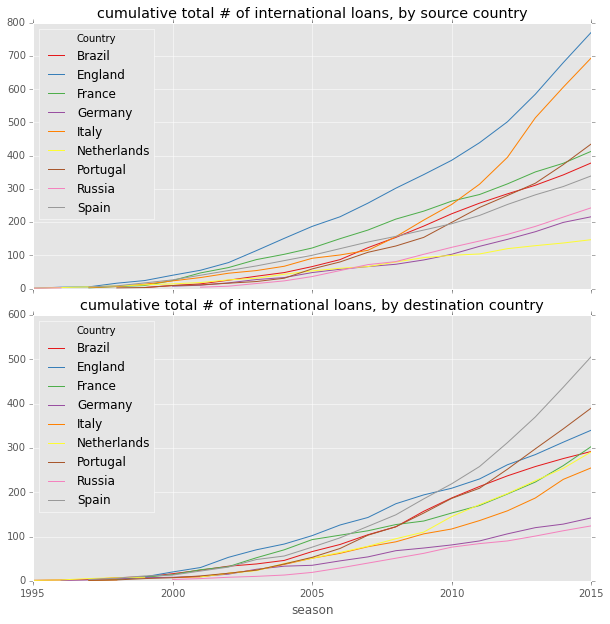

In [44]:
countrylist=['Brazil','England','Spain','Germany','Italy','France','Netherlands','Portugal','Russia']

origin=loans[(loans['fromCountry']!=loans['toCountry'])&(loans['fromCountry'].isin(countrylist))] \
    .rename(columns={'fromCountry':'Country'}).groupby(['season','Country'])['id'].count().unstack() \
    .cumsum()
destination=loans[(loans['fromCountry']!=loans['toCountry'])&(loans['toCountry'].isin(countrylist))] \
    .rename(columns={'toCountry':'Country'}).groupby(['season','Country'])['id'].count().unstack() \
    .cumsum()


fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10,10),sharex=True,sharey=False)


origin.plot(ax=axes[0],colormap='Set1',title="cumulative total # of international loans, by source country",xticks=[1995,2000,2005,2010,2015])
destination.plot(ax=axes[1],colormap='Set1',title="cumulative total # of international loans, by destination country",xlim=(1995,2015))

plt.subplots_adjust(wspace=0,hspace=0.1)

fig.savefig('intl_loans_by_country.png')


#ax1.set(sub1)

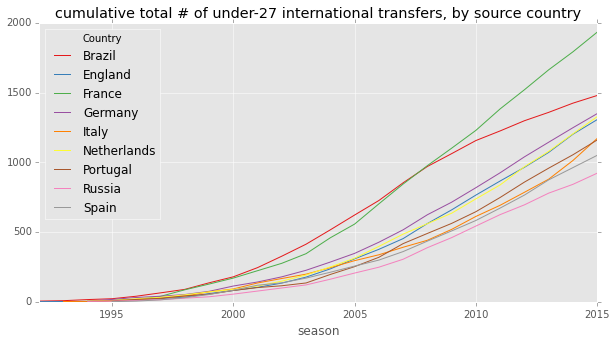

In [47]:
countrylist=['Brazil','England','Spain','Germany','Italy','France','Netherlands','Portugal','Russia']

origin=nonloans[(nonloans['fromCountry']!=nonloans['toCountry'])&(nonloans['fromCountry'].isin(countrylist))&(nonloans['Age']<27)] \
    .rename(columns={'fromCountry':'Country'}).groupby(['season','Country'])['id'].count().unstack() \
    .cumsum()
destination=nonloans[(nonloans['fromCountry']!=nonloans['toCountry'])&(nonloans['toCountry'].isin(countrylist))&(nonloans['Age']<27)] \
    .rename(columns={'toCountry':'Country'}).groupby(['season','Country'])['id'].count().unstack() \
    .cumsum()


fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,5),sharex=True,sharey=False)


origin.plot(ax=axes,colormap='Set1',title="cumulative total # of under-27 international transfers, by source country",xticks=[1995,2000,2005,2010,2015])
#destination.plot(ax=axes[1],colormap='Set1',title="cumulative total # of under-27 international transfers, by destination country",xlim=(1995,2015))

plt.subplots_adjust(wspace=0,hspace=0.1)

fig.savefig('intl_u27_transfers_by_country.png')


#ax1.set(sub1)

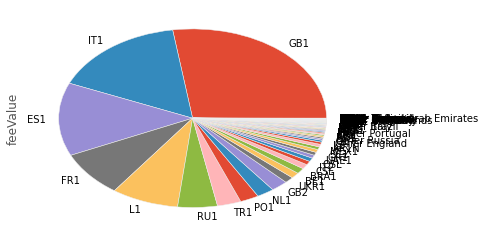

In [35]:
nonloans[(nonloans['season'].between(2000,2015))].groupby('toLeague')['feeValue'].sum().sort_values(ascending=False)[:100].plot.pie()

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
from urllib2 import urlopen, Request
from bs4 import BeautifulSoup
from pandas import DataFrame
import pandas as pd
import numpy as np
import re
import os.path 
import datetime 
import math

transfers = pd.read_csv('../data/merged/transfers.csv')
transfers['period']=pd.cut(transfers['season'],[1995,2000,2005,2010,2015])
loans=transfers[transfers['isLoan']]
nonloans=transfers[~transfers['isLoan']]
players=pd.read_csv('../data/merged/players.csv')

leagueCodeMapping = {'GB1':'Premier League (England)','FR1':'Ligue 1 (France)',
                                                         'ES1':'La Liga (Spain)','IT1':'Serie A (Italy)','L1':'Bundesliga (Germany)',
                                                         'PO1':'Primeira Liga (Portugal)','NL1':'Eredivisie (Netherlands)'}

/Users/sunkevin/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2871: DtypeWarning: Columns (32,40,45,47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/sunkevin/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2871: DtypeWarning: Columns (32,34) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [54]:
print len(players)
print len(transfers)
print len(nonloans)
print len(loans)

27081
163314
139150
24164
